<a href="https://colab.research.google.com/github/jumbokh/nknu-class/blob/main/CNN/notebooks/09_07_%E8%87%89%E9%83%A8%E5%81%B5%E6%B8%AC_mtcnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MTCNN 臉部偵測(Face Detection)

## 載入相關套件

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -fs /content/gdrive/My\ Drive /app
%cd /app/DL_Book/src

Mounted at /content/gdrive
/content/gdrive/My Drive/DL_Book/src


In [5]:
!pip install MTCNN

     |████████████████████████████████| 2.3 MB 6.8 MB/s 


In [6]:
# 安裝套件： pip install mtcnn
# 載入相關套件
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
from mtcnn.mtcnn import MTCNN

## 載入並顯示圖檔

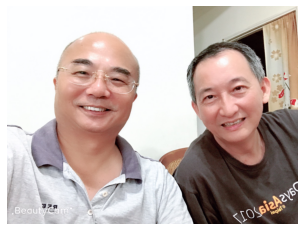

In [7]:
# 載入圖檔
image_file = "../images_face/classmates.jpg"
image = plt.imread(image_file)

# 顯示圖像
plt.imshow(image)
plt.axis('off')
plt.show()

## 建立 MTCNN 物件，偵測臉部

In [8]:
# 建立 MTCNN 物件
detector = MTCNN()

# 偵測臉部
faces = detector.detect_faces(image)

## 臉部加框，顯示圖像

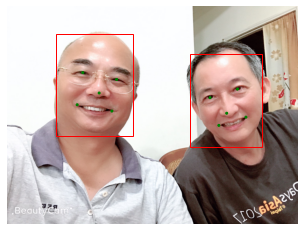

In [9]:
# 臉部加框
ax = plt.gca()
for result in faces:
    # 取得框的座標及寬高
    x, y, width, height = result['box']
    # 加紅色框
    rect = Rectangle((x, y), width, height, fill=False, color='red')
    ax.add_patch(rect)
    
    # 特徵點
    for key, value in result['keypoints'].items():
        # create and draw dot
        dot = Circle(value, radius=5, color='green')
        ax.add_patch(dot)
    
# 顯示圖像
plt.imshow(image)
plt.axis('off')
plt.show()

## 偵測臉部並個別顯示每一張臉

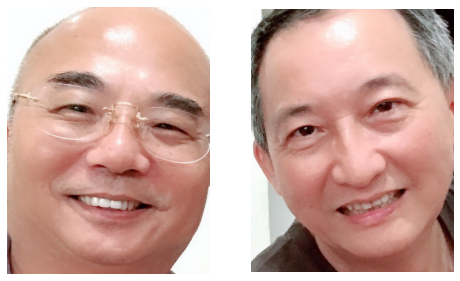

In [10]:
# 臉部加框
plt.figure(figsize=(8,6))
ax = plt.gca()

for i, result in enumerate(faces):
    # 取得框的座標及寬高
    x1, y1, width, height = result['box']
    x2, y2 = x1 + width, y1 + height
    
    # 顯示圖像
    plt.subplot(1, len(faces), i+1)
    plt.axis('off')
    plt.imshow(image[y1:y2, x1:x2])
plt.show()